In [1]:
import pandas as pd
from basic.arrange_data import *
from basic.stats import *
from data_visualisation.plot_psd import *
from data_visualisation.process_group_psd_data import *
from data_visualisation.plot_scatter import *

**Spectral analysis data visualisation**

Change these parameters! Set the folder of EEG power spectrum density files

*NB! The path has to be relative to this notebook.*

In [7]:
"""
VARIABLES TO CHANGE
psd_{xxx}_folder: A relative folder location of the regional/channels/asymmetry PSD files
exp_folder: A relative folder location of the comparable experiments as a list of strings
condition_code_list: A list of compared experiments' short codes (reference to exp_condition from 02-notebook)
stat_test: The name of the statistical test to be used
"""
psd_reg_folder,psd_ch_folder,psd_faa_folder = r"Results\Absolute PSD\regions", r"Results\Absolute PSD\channels", r"Results\Absolute PSD"
condition_legend = ['Baseline','6 weeks','10 weeks']
stat_test = 'Wilcoxon'
#non_responders = "OKTOS_0003|OKTOS_0008|OKTOS_0011|OKTOS_0012|OKTOS_0025|OKTOS_0026|OKTOS_0027|OKTOS_0040"

exp_folder_ec = [r"Eyes Closed\Baseline",
                 r"Eyes Closed\6 weeks",
                 r"Eyes Closed\10 weeks"]
condition_codes_ec = ['EC_00','EC_06','EC_07']
condition_codes_comparisons_ec = [['EC_00','EC_06'],['EC_06','EC_07'],['EC_00','EC_07']]

exp_folder_eo = [r"Eyes Open\Baseline",
                 r"Eyes Open\6 weeks",
                 r"Eyes Open\10 weeks"]
condition_codes_eo = ['EO_00','EO_06','EO_07']
condition_codes_comparisons_eo = [['EO_00','EO_06'],['EO_06','EO_07'],['EO_00','EO_07']]

Run this script to load in all the necessary data for plotting. Also it will display you all the significant changes which will help you choose what regions and bands to plot.

In [8]:
print('Eyes closed')
[df_psd_reg_ec,df_psd_ch_ec,epochs_ec] = read_group_psd_data(psd_reg_folder,psd_ch_folder,psd_faa_folder,
                                                    exp_folder_ec,non_responders=None)
export_group_psd_comparison(psd_reg_folder,psd_ch_folder,df_psd_reg_ec,df_psd_ch_ec,stat_test,
                            condition_codes_comparisons_ec,verbose=True)

print('\nEyes open')
[df_psd_reg_eo,df_psd_ch_eo,epochs_eo] = read_group_psd_data(psd_reg_folder,psd_ch_folder,psd_faa_folder,
                                                    exp_folder_eo,non_responders=None)
export_group_psd_comparison(psd_reg_folder,psd_ch_folder,df_psd_reg_eo,df_psd_ch_eo,stat_test,
                            condition_codes_comparisons_eo,verbose=True)


Eyes closed
Wilcoxon: ['EC_00', 'EC_06'] Alpha significant at ['Centro-parietal']
Wilcoxon: ['EC_00', 'EC_06'] Alpha significant at ['Pz']
Wilcoxon: ['EC_00', 'EC_06'] Delta significant at ['Fp1' 'AF3' 'FC6']
Wilcoxon: ['EC_00', 'EC_06'] High-Beta significant at ['T7']
Wilcoxon: ['EC_00', 'EC_06'] Low-Beta significant at ['FC1' 'Pz']
Wilcoxon: ['EC_06', 'EC_07'] Alpha significant at ['Temporal' 'Centro-parietal']
Wilcoxon: ['EC_06', 'EC_07'] Low-Beta significant at ['Temporal' 'Occipital']
Wilcoxon: ['EC_06', 'EC_07'] Theta significant at ['Temporal' 'Centro-parietal' 'Occipital']
Wilcoxon: ['EC_06', 'EC_07'] Alpha significant at ['FC5' 'T7' 'C3' 'CP5' 'P3' 'PO3' 'PO4' 'P4' 'CP6' 'CP2' 'C4' 'T8' 'FC6'
 'FC2' 'F4']
Wilcoxon: ['EC_06', 'EC_07'] Delta significant at ['Oz' 'P8' 'CP6' 'T8']
Wilcoxon: ['EC_06', 'EC_07'] High-Beta significant at ['CP6' 'FC6']
Wilcoxon: ['EC_06', 'EC_07'] Low-Beta significant at ['O2' 'P4' 'CP6' 'FC6']
Wilcoxon: ['EC_06', 'EC_07'] Theta significant at ['PO3' '

In [9]:
clinical_data_path = r'C:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\clinicaldata.xlsx'

# Read clinical outcomes data and add it to the PSD data
df_psd_reg_withclinical_ec = add_clinical_data_to_psd(df_psd_reg_ec,clinical_data_path,rstrip='_EC')
df_psd_reg_withclinical_eo = add_clinical_data_to_psd(df_psd_reg_eo,clinical_data_path,rstrip='_EO')

# Create comparison dataframe for PSD and clinical outcomes data applying comparison pairs
df_psd_withclinical_comparison_ec = apply_comparison_pairs_to_data(df_psd_reg_withclinical_ec,
                                                                   condition_codes_comparisons_ec)
df_psd_withclinical_comparison_eo = apply_comparison_pairs_to_data(df_psd_reg_withclinical_eo,
                                                                   condition_codes_comparisons_eo)
                                                                   
# Merge the dataframes of the two states (EC, EO) together
df_psd_withclinical_comparison_ec['State'] = 'Eyes closed'
df_psd_withclinical_comparison_eo['State'] = 'Eyes open'
df_psd_clinical_comparison = pd.concat([df_psd_withclinical_comparison_ec,df_psd_withclinical_comparison_eo])
df_psd_clinical_comparison['Condition'] = df_psd_clinical_comparison['Condition']\
                                                .str.replace(r'EC_', '').str.replace(r'EO_', '')

**Plotting part**

Correlation scatter plot example

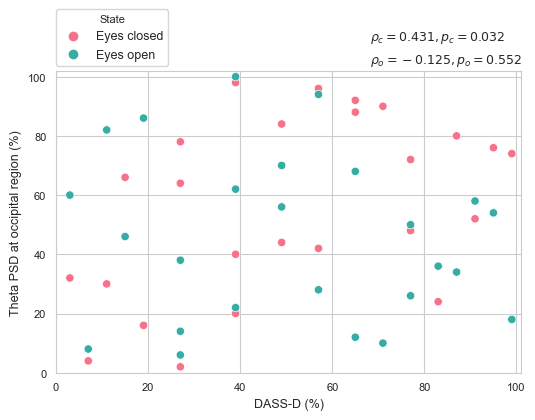

In [10]:
plot_correlation(df_psd_clinical_comparison,band='Theta',comparison_cond=['06','07'],region='Occipital',
                  clinical_outcome='Dass21_depression',state=['Eyes closed','Eyes open'],
                  labels=['DASS-D (%)','Theta PSD at occipital region (%)'],correlation='Spearman',
                  fnt=['sans-serif',9,8],color_palette=["#5A9","husl"],title=False,export=False)



Boxplots and topomaps for displaying power spectra

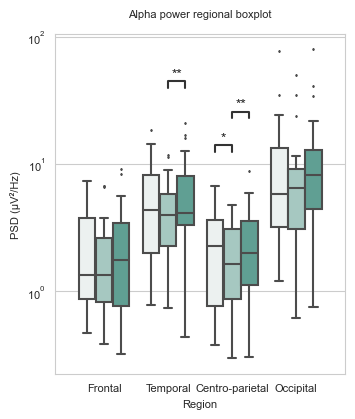

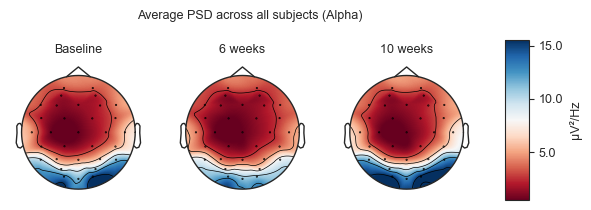

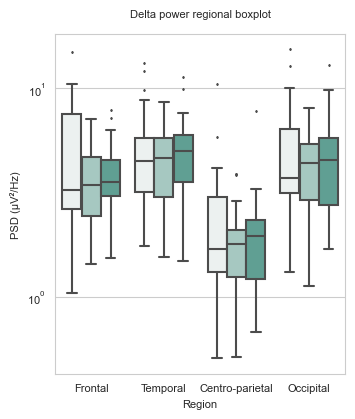

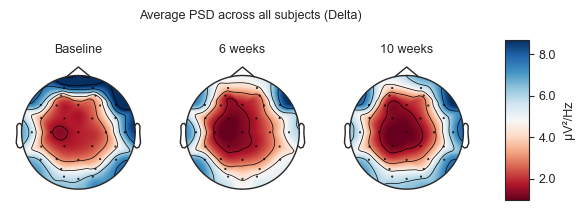

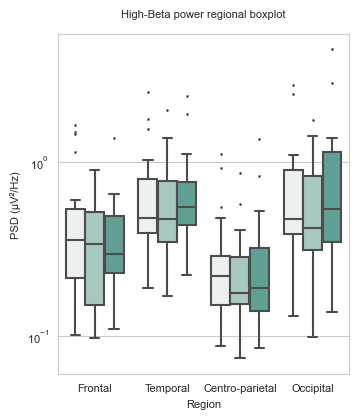

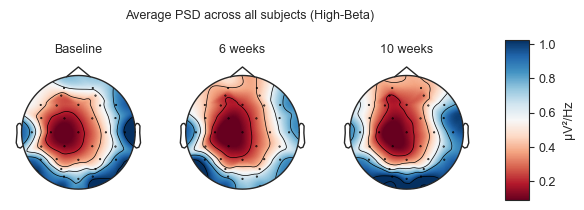

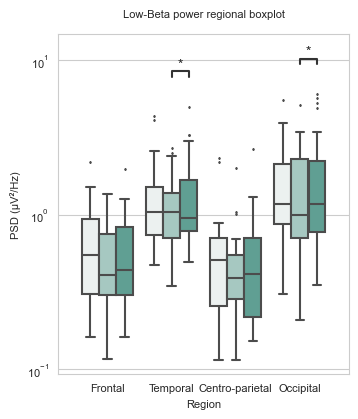

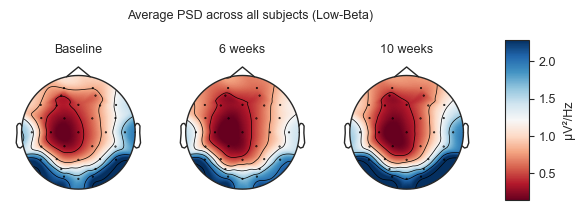

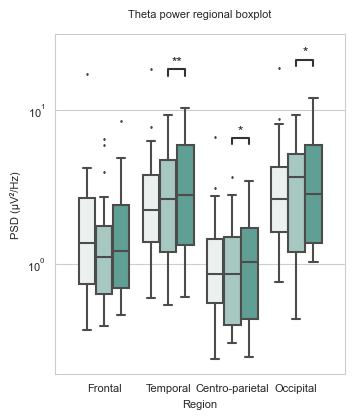

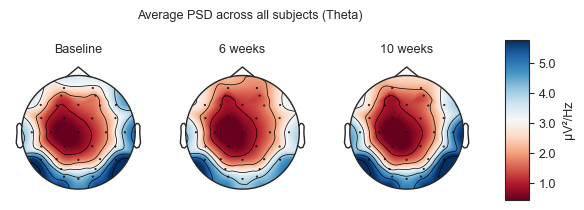

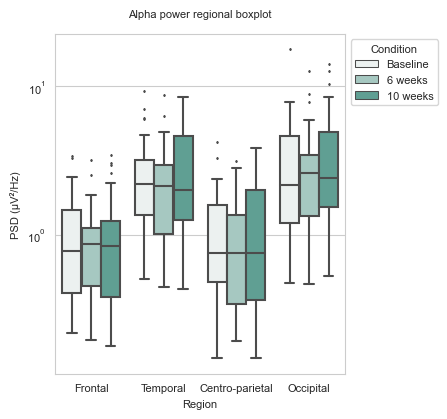

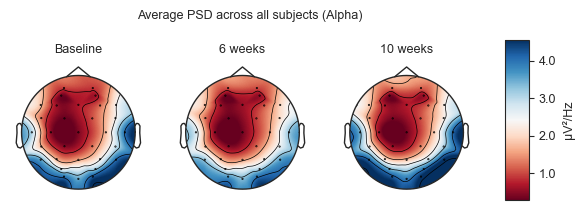

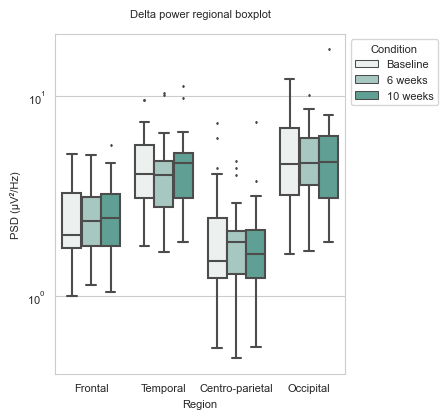

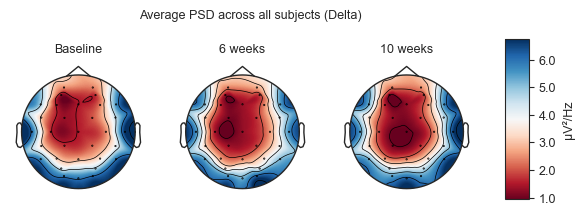

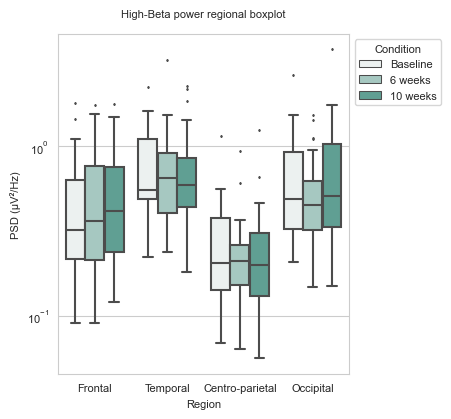

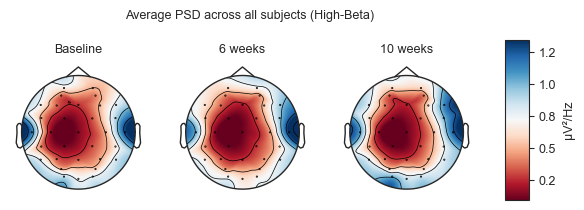

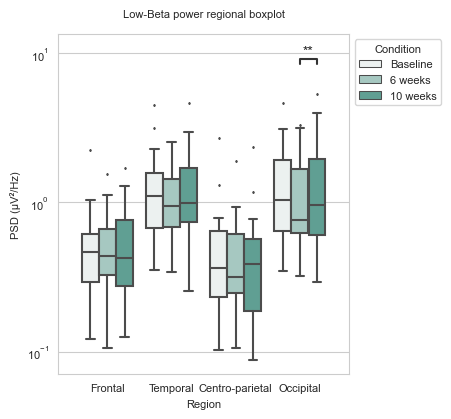

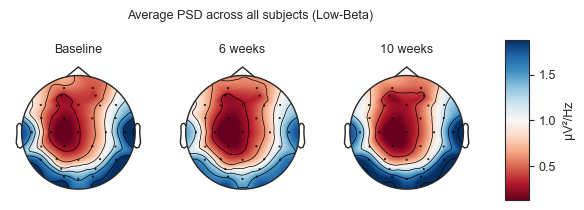

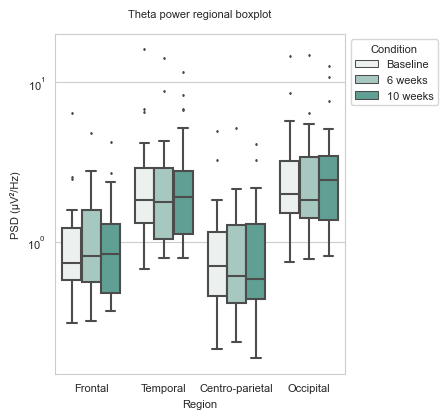

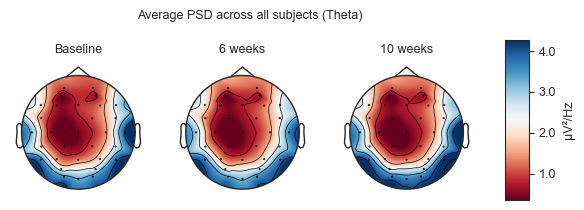

In [12]:
for b_name in (df_psd_reg_ec['Frequency band'].unique()):
    plot_boxplot_band(df_psd_reg_ec,regions=['Frontal','Temporal','Centro-parietal','Occipital'],band=b_name,
                      condition_comp_list=condition_codes_comparisons_ec,figsize=(3.75,4.5),yscale='log',
                      condition_legend=condition_legend,fnt=['sans-serif',8,8],palette="light:#5A9",
                      legend=False,title=True,stat_test=stat_test,ast_loc='inside',verbose=False,export=False)
    plot_topomaps_band(df_psd_ch_ec,epochs_ec,b_name,condition_legend=condition_legend,
                       conditions=condition_codes_ec,fnt=['sans-serif',9],cmap='RdBu',title=True,export=False)

for b_name in (df_psd_reg_eo['Frequency band'].unique()):
    plot_boxplot_band(df_psd_reg_eo,regions=['Frontal','Temporal','Centro-parietal','Occipital'],band=b_name,
                      condition_comp_list=condition_codes_comparisons_eo,figsize=(3.75,4.5),yscale='log',
                      condition_legend=condition_legend,fnt=['sans-serif',8,8],palette="light:#5A9",
                      legend={'loc':'upper left','bbox_to_anchor':(1, 1)},title=True,stat_test=stat_test,
                      ast_loc='inside',verbose=False,export=False)
    plot_topomaps_band(df_psd_ch_eo,epochs_eo,b_name,condition_legend=condition_legend,
                       conditions=condition_codes_eo,fnt=['sans-serif',9],cmap='RdBu',title=True,export=False)

For EO data